- 2.7 million people tuned in to watch the finals at last years International. 

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import json
import datetime
from collections import Counter
# Significance Test
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, f1_score, precision_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB, GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# NLP
import re
import nltk
from nltk.corpus import stopwords

In [67]:
df = pd.read_csv('Data/USvideos.csv')

In [68]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [69]:
df.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [71]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [72]:
df = df.drop(columns="video_id")

In [73]:
df = df.drop(columns='comments_disabled')

In [74]:
df = df.drop(columns="title")

In [75]:
df = df.drop(columns="channel_title")

In [76]:
df = df.drop(columns='ratings_disabled')

In [77]:
df = df.drop(columns="thumbnail_link")

In [78]:
df = df.drop(columns="video_error_or_removed")

In [79]:
def clean_trending_date(date):
    y,d,m = date.split('.')
    return datetime.date(int(y)+2000,int(m),int(d))
def clean_publish_time(time):
    y,m,d = time.split('T')[0].split('-')
    return datetime.date(int(y), int(m), int(d))

In [80]:
trending_date = []
for date in list(range(0,len(df))):
    trending_date.append(clean_trending_date(df['trending_date'][date]))
df['trending_date'] = trending_date

In [81]:
publish_date = []
for date in list(range(0,len(df))):
    publish_date.append(clean_publish_time(df['publish_time'][date]))
df['publish_time'] = publish_date

In [82]:
df['trending_month'] = pd.DatetimeIndex(df['trending_date']).month

In [83]:
df['trending_year'] = pd.DatetimeIndex(df['trending_date']).year

In [84]:
df['trending_day'] = pd.DatetimeIndex(df['trending_date']).day

In [85]:
df['publish_month'] = pd.DatetimeIndex(df['publish_time']).month

In [86]:
df['publish_year'] = pd.DatetimeIndex(df['publish_time']).year

In [87]:
df['publish_day'] = pd.DatetimeIndex(df['publish_time']).day

In [88]:
df = df.drop(columns='trending_date')

In [89]:
df = df.drop(columns='publish_time')

In [90]:
df

,category_id,tags,views,likes,dislikes,comment_count,description,trending_month,trending_year,trending_day,publish_month,publish_year,publish_day
0,22,SHANtell martin,748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...,11,2017,14,11,2017,13
1,24,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,"One year after the presidential election, John...",11,2017,14,11,2017,13
2,23,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,11,2017,14,11,2017,12
3,24,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,Today we find out if Link is a Nickelback amat...,11,2017,14,11,2017,13
4,24,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,I know it's been a while since we did this sho...,11,2017,14,11,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,15,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,The Cat Who Caught the Laser - Aaron's Animals,6,2018,14,5,2018,18
40945,22,[none],1064798,60008,382,3936,NaN,6,2018,14,5,2018,18
40946,24,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,I had so much fun transforming Safiyas hair in...,6,2018,14,5,2018,18
40947,1,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,How Black Panther Should Have EndedWatch More ...,6,2018,14,5,2018,17


In [91]:
df['views'].mean()

2360784.6382573447

In [92]:
df['views'][0]

748374

In [93]:
np.expm1(np.log1p(df['views'][0]))

748374.0

<AxesSubplot:>

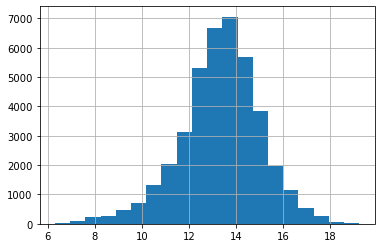

In [94]:
np.log1p(df['views']).hist(bins=20)

In [95]:
views = list(df['views'].values)

In [96]:
Is_Successful = []
for view in list(range(0,len(df))):
    if views[view] > 100000:
            Is_Successful.append(True)
    else:
            Is_Successful.append(False)
    
df['Successful'] = Is_Successful

In [97]:
df

,category_id,tags,views,likes,dislikes,comment_count,description,trending_month,trending_year,trending_day,publish_month,publish_year,publish_day,Successful
0,22,SHANtell martin,748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...,11,2017,14,11,2017,13,True
1,24,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,"One year after the presidential election, John...",11,2017,14,11,2017,13,True
2,23,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,11,2017,14,11,2017,12,True
3,24,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,Today we find out if Link is a Nickelback amat...,11,2017,14,11,2017,13,True
4,24,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,I know it's been a while since we did this sho...,11,2017,14,11,2017,12,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,15,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,The Cat Who Caught the Laser - Aaron's Animals,6,2018,14,5,2018,18,True
40945,22,[none],1064798,60008,382,3936,NaN,6,2018,14,5,2018,18,True
40946,24,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,I had so much fun transforming Safiyas hair in...,6,2018,14,5,2018,18,True
40947,1,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,How Black Panther Should Have EndedWatch More ...,6,2018,14,5,2018,17,True


In [98]:
df['Successful'].value_counts(normalize=True)

True     0.869838
False    0.130162
Name: Successful, dtype: float64

In [99]:
df['tag_list'] = df['tags'].astype('str').str.split('|')

In [100]:
df

,category_id,tags,views,likes,dislikes,comment_count,description,trending_month,trending_year,trending_day,publish_month,publish_year,publish_day,Successful,tag_list
0,22,SHANtell martin,748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...,11,2017,14,11,2017,13,True,[SHANtell martin]
1,24,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,"One year after the presidential election, John...",11,2017,14,11,2017,13,True,"[last week tonight trump presidency, ""last wee..."
2,23,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,11,2017,14,11,2017,12,True,"[racist superman, ""rudy"", ""mancuso"", ""king"", ""..."
3,24,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,Today we find out if Link is a Nickelback amat...,11,2017,14,11,2017,13,True,"[rhett and link, ""gmm"", ""good mythical morning..."
4,24,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,I know it's been a while since we did this sho...,11,2017,14,11,2017,12,True,"[ryan, ""higa"", ""higatv"", ""nigahiga"", ""i dare y..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,15,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,The Cat Who Caught the Laser - Aaron's Animals,6,2018,14,5,2018,18,True,"[aarons animals, ""aarons"", ""animals"", ""cat"", ""..."
40945,22,[none],1064798,60008,382,3936,NaN,6,2018,14,5,2018,18,True,[[none]]
40946,24,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,I had so much fun transforming Safiyas hair in...,6,2018,14,5,2018,18,True,[I gave safiya nygaard a perfect hair makeover...
40947,1,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,How Black Panther Should Have EndedWatch More ...,6,2018,14,5,2018,17,True,"[Black Panther, ""HISHE"", ""Marvel"", ""Infinity W..."


In [101]:
num_of_tags = []
for number in list(range(0,len(df))):
    num_of_tags.append(len(df['tag_list'][number]))

In [102]:
df['Number_of_Tags'] = num_of_tags

In [103]:
df = df.drop(columns='tags')

In [104]:
df['category_id'] = df['category_id'].astype(str)

In [105]:
categories = []
for category in df['category_id']:
    if category.__contains__('10'):
        categories.append('Music')
    elif category.__contains__('15'):
        categories.append('Pets & Animals')
    elif category.__contains__('17'):
        categories.append('Sport')
    elif category.__contains__('19'):
        categories.append('Travel & Events')
    elif category.__contains__('20'):
        categories.append('Gaming')
    elif category.__contains__('22'):
        categories.append('People & Blogs')
    elif category.__contains__('23'):
        categories.append('Comedy')
    elif category.__contains__('24'):
        categories.append('Entertainment')
    elif category.__contains__('25'):
        categories.append('News & Politics')
    elif category.__contains__('26'):
        categories.append('How-to & Style')
    elif category.__contains__('27'):
        categories.append('Education')
    elif category.__contains__('28'):
        categories.append('Science & Technology')
    elif category.__contains__('29'):
        categories.append('Non-profits & Activism')
    elif category.__contains__('43'):
        categories.append('Shows')
    elif category.__contains__('1'):
        categories.append('Film & Animation')
    elif category.__contains__('2'):
        categories.append('Cars & Vehicles')

df['Genre'] = categories

In [106]:
df['Genre'].value_counts()

Entertainment             9964
Music                     6472
How-to & Style            4146
Comedy                    3457
People & Blogs            3210
News & Politics           2487
Science & Technology      2401
Film & Animation          2345
Sport                     2174
Education                 1656
Pets & Animals             920
Gaming                     817
Travel & Events            402
Cars & Vehicles            384
Non-profits & Activism      57
Shows                       57
Name: Genre, dtype: int64

In [107]:
df = df.drop(columns='tag_list')

In [108]:
df

,category_id,views,likes,dislikes,comment_count,description,trending_month,trending_year,trending_day,publish_month,publish_year,publish_day,Successful,Number_of_Tags,Genre
0,22,748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...,11,2017,14,11,2017,13,True,1,People & Blogs
1,24,2418783,97185,6146,12703,"One year after the presidential election, John...",11,2017,14,11,2017,13,True,4,Entertainment
2,23,3191434,146033,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,11,2017,14,11,2017,12,True,23,Comedy
3,24,343168,10172,666,2146,Today we find out if Link is a Nickelback amat...,11,2017,14,11,2017,13,True,27,Entertainment
4,24,2095731,132235,1989,17518,I know it's been a while since we did this sho...,11,2017,14,11,2017,12,True,14,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,15,1685609,38160,1385,2657,The Cat Who Caught the Laser - Aaron's Animals,6,2018,14,5,2018,18,True,14,Pets & Animals
40945,22,1064798,60008,382,3936,NaN,6,2018,14,5,2018,18,True,1,People & Blogs
40946,24,1066451,48068,1032,3992,I had so much fun transforming Safiyas hair in...,6,2018,14,5,2018,18,True,24,Entertainment
40947,1,5660813,192957,2846,13088,How Black Panther Should Have EndedWatch More ...,6,2018,14,5,2018,17,True,22,Film & Animation


In [109]:
df['description'] = df['description'].astype('str').str.split(' ')

In [110]:
df

,category_id,views,likes,dislikes,comment_count,description,trending_month,trending_year,trending_day,publish_month,publish_year,publish_day,Successful,Number_of_Tags,Genre
0,22,748374,57527,2966,15954,"[SHANTELL'S, CHANNEL, -, https://www.youtube.c...",11,2017,14,11,2017,13,True,1,People & Blogs
1,24,2418783,97185,6146,12703,"[One, year, after, the, presidential, election...",11,2017,14,11,2017,13,True,4,Entertainment
2,23,3191434,146033,5339,8181,"[WATCH, MY, PREVIOUS, VIDEO, ▶, \n\nSUBSCRIBE,...",11,2017,14,11,2017,12,True,23,Comedy
3,24,343168,10172,666,2146,"[Today, we, find, out, if, Link, is, a, Nickel...",11,2017,14,11,2017,13,True,27,Entertainment
4,24,2095731,132235,1989,17518,"[I, know, it's, been, a, while, since, we, did...",11,2017,14,11,2017,12,True,14,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,15,1685609,38160,1385,2657,"[The, Cat, Who, Caught, the, Laser, -, Aaron's...",6,2018,14,5,2018,18,True,14,Pets & Animals
40945,22,1064798,60008,382,3936,[nan],6,2018,14,5,2018,18,True,1,People & Blogs
40946,24,1066451,48068,1032,3992,"[I, had, so, much, fun, transforming, Safiyas,...",6,2018,14,5,2018,18,True,24,Entertainment
40947,1,5660813,192957,2846,13088,"[How, Black, Panther, Should, Have, EndedWatch...",6,2018,14,5,2018,17,True,22,Film & Animation


In [111]:
len(df['description'][0])

136

In [112]:
num_of_words = []
for num in list(range(0,len(df))):
    num_of_words.append(len(df['description'][num]))

In [113]:
df['description_length'] = num_of_words

In [114]:
df = df.loc[(df['views'] > 1000) & (df['likes'] > 100 )]

In [115]:
df = df.drop(columns="category_id")

In [116]:
df = df.drop(columns='description')

In [117]:
X = df.drop(columns='Successful')
y = df['Successful']

In [118]:
df

,views,likes,dislikes,comment_count,trending_month,trending_year,trending_day,publish_month,publish_year,publish_day,Successful,Number_of_Tags,Genre,description_length
0,748374,57527,2966,15954,11,2017,14,11,2017,13,True,1,People & Blogs,136
1,2418783,97185,6146,12703,11,2017,14,11,2017,13,True,4,Entertainment,80
2,3191434,146033,5339,8181,11,2017,14,11,2017,12,True,23,Comedy,74
3,343168,10172,666,2146,11,2017,14,11,2017,13,True,27,Entertainment,123
4,2095731,132235,1989,17518,11,2017,14,11,2017,12,True,14,Entertainment,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,1685609,38160,1385,2657,6,2018,14,5,2018,18,True,14,Pets & Animals,9
40945,1064798,60008,382,3936,6,2018,14,5,2018,18,True,1,People & Blogs,1
40946,1066451,48068,1032,3992,6,2018,14,5,2018,18,True,24,Entertainment,67
40947,5660813,192957,2846,13088,6,2018,14,5,2018,17,True,22,Film & Animation,242


In [54]:
X, X_hold, y, y_hold = train_test_split(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [55]:
cat_columns = [c for c in X_train.columns if X_train[c].dtype == 'O']
cat_columns

num_columns = [
    'likes',
    'dislikes',
    'comment_count',
    'Number_of_Tags',
    'description_length',
    'trending_month',
    'trending_year',
    'trending_day',
    'publish_month',
    'publish_year',
    'publish_day'
]

used_cols = [*cat_columns, *num_columns]
used_cols

['Genre',
 'likes',
 'dislikes',
 'comment_count',
 'Number_of_Tags',
 'description_length',
 'trending_month',
 'trending_year',
 'trending_day',
 'publish_month',
 'publish_year',
 'publish_day']

In [56]:
cat_transformer = OneHotEncoder(drop='first', handle_unknown = 'error', sparse= False)

num_transformer = StandardScaler()
preprocessor = ColumnTransformer([
    ('cats', cat_transformer, cat_columns),
    ('nums', num_transformer, num_columns)
])

In [57]:
#Modeless Baseline
pd.Series(y_train).value_counts(normalize=True)

True     0.88905
False    0.11095
Name: Successful, dtype: float64

In [58]:
def evaluate(model, Xtr, Xte, ytr, yte):
    train_preds = model.predict(X_train[used_cols])
    test_preds = model.predict(X_test[used_cols])

    train_probas = clf_dt.predict_proba(X_train[used_cols])[:, 1]
    test_probas = clf_dt.predict_proba(X_test[used_cols])[:, 1]

    plot_confusion_matrix(model, Xte, yte)
    plot_roc_curve(model, X_test[used_cols], y_test);
    
    print(f"Train F1: {f1_score(ytr, train_preds):.4f}")
    print(f"Train Precision: {precision_score(ytr, train_preds):.4f}")
    print(f"Train ROC-AUC: {roc_auc_score(ytr, train_preds):.4f}")
    print("*" * 20)
    print(f"Test F1: {f1_score(yte, test_preds):.4f}")
    print(f"Test Precision: {precision_score(yte, test_preds):.4f}")
    print(f"Test ROC-AUC: {roc_auc_score(yte, test_preds):.4f}")

<AxesSubplot:>

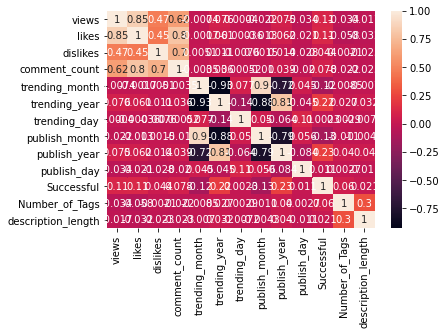

In [122]:
sns.heatmap(df.corr(), annot=True)

# All Elements

## Decision Tree

Train F1: 0.9707
Train Precision: 0.9662
Train ROC-AUC: 0.8510
********************
Test F1: 0.9691
Test Precision: 0.9625
Test ROC-AUC: 0.8374


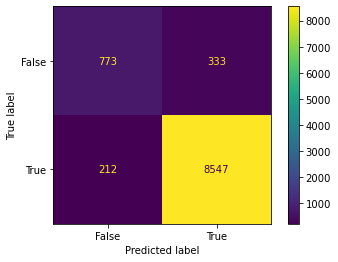

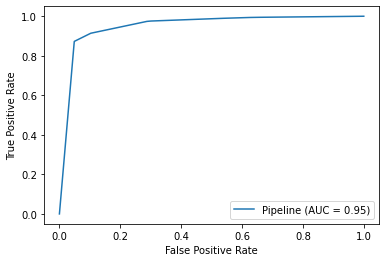

In [60]:
clf_dt = Pipeline(steps = [
('preprocessor', preprocessor),
('tree', DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_leaf=1))])

clf_dt.fit(X_train[used_cols], y_train)

train_preds = clf_dt.predict(X_train[used_cols])
test_preds = clf_dt.predict(X_test[used_cols])

train_probas = clf_dt.predict_proba(X_train[used_cols])[:, 1]
test_probas = clf_dt.predict_proba(X_test[used_cols])[:, 1]
    
param_grid = {
"tree__max_depth": [3, 4, 5],
"tree__min_samples_leaf": [1, 2, 10],}

gs = GridSearchCV(clf_dt, param_grid, cv=5, scoring="roc_auc")
gs.fit(X_train[used_cols], y_train)
    
evaluate(clf_dt, X_train[used_cols], X_test[used_cols], y_train, y_test)


## Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

Train F1: 0.9662
Train Precision: 0.9461
Train ROC-AUC: 0.7683
********************
Test F1: 0.9659
Test Precision: 0.9443
Test ROC-AUC: 0.7633


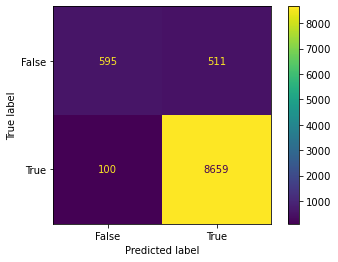

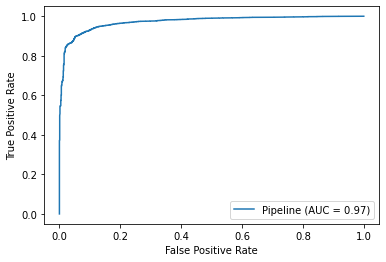

In [62]:
clf_rf = Pipeline(steps = [
('preprocessor', preprocessor),
('rf', RandomForestClassifier(random_state=42, max_depth=3, min_samples_leaf=1))])

clf_rf.fit(X_train[used_cols], y_train)

evaluate(clf_rf, X_train[used_cols], X_test[used_cols], y_train, y_test)
    

## Logistic Regression

Train F1: 0.9552
Train Precision: 0.9284
Train ROC-AUC: 0.6878
********************
Test F1: 0.9528
Test Precision: 0.9248
Test ROC-AUC: 0.6748


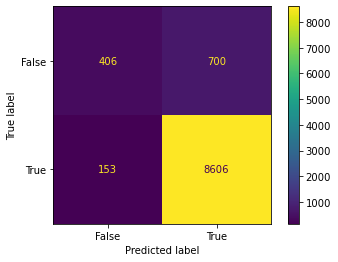

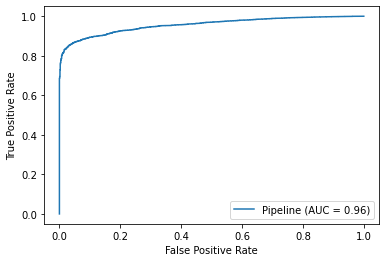

In [63]:
clf_lr = Pipeline(steps=[
('preprocessor', preprocessor),
('logreg', LogisticRegression(random_state=42, max_iter=200))])

clf_lr.fit(X_train[used_cols], y_train)

evaluate(clf_lr, X_train[used_cols], X_test[used_cols], y_train, y_test)
    

## Naive Bayes

Train F1: 0.8909
Train Precision: 0.9951
Train ROC-AUC: 0.8874
********************
Test F1: 0.8893
Test Precision: 0.9946
Test ROC-AUC: 0.8849


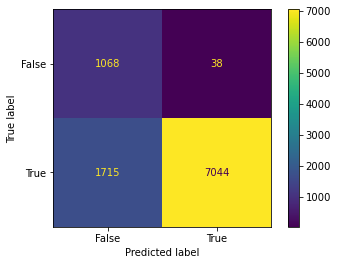

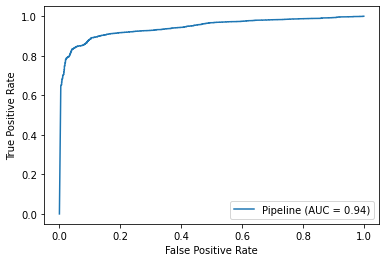

In [64]:
clf_nb = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('bayes', GaussianNB())
])
clf_nb.fit(X_train[used_cols], y_train)

evaluate(clf_nb, X_train[used_cols], X_test[used_cols], y_train, y_test)

# Just the Film & Animation Genre

In [65]:
df_Film = df.loc[df['Genre']== 'Film & Animation']
df_Film

,views,likes,dislikes,comment_count,trending_month,trending_year,trending_day,publish_month,publish_year,publish_day,Successful,Number_of_Tags,Genre,description_length
8,826059,3543,119,340,11,2017,14,11,2017,13,True,28,Film & Animation,148
29,50867,715,238,246,11,2017,14,5,2011,29,False,8,Film & Animation,12
36,288922,7515,792,2111,11,2017,14,11,2017,12,True,28,Film & Animation,54
71,52591,2233,187,255,11,2017,14,11,2017,11,False,12,Film & Animation,200
86,1751064,16430,945,1231,11,2017,14,11,2017,9,True,13,Film & Animation,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40868,5160625,2650,66,567,6,2018,14,5,2018,31,True,17,Film & Animation,215
40886,1921167,58740,1292,6149,6,2018,14,5,2018,29,True,14,Film & Animation,92
40893,1091528,40613,1010,1805,6,2018,14,5,2018,27,True,45,Film & Animation,265
40937,8300584,266267,4237,14617,6,2018,14,5,2018,19,True,4,Film & Animation,10


In [66]:
df_Film.describe()

,views,likes,dislikes,comment_count,trending_month,trending_year,trending_day,publish_month,publish_year,publish_day,Number_of_Tags,description_length
count,2.274000e+03,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000
mean,3.202207e+06,72996.990325,2671.368514,7865.639402,5.175901,2017.782322,15.816183,5.225594,2017.726473,16.157432,18.854002,125.740985
std,5.635737e+06,119373.085432,4015.286626,11928.374183,3.738578,0.412758,8.723175,3.840603,0.579708,8.375525,11.732866,83.813660
min,8.023000e+03,107.000000,2.000000,0.000000,1.000000,2017.000000,1.000000,1.000000,2011.000000,1.000000,1.000000,1.000000
25%,3.668305e+05,5324.500000,209.250000,618.000000,2.000000,2018.000000,8.000000,2.000000,2018.000000,9.000000,10.000000,66.000000
50%,1.351096e+06,26738.500000,1095.500000,2880.500000,4.000000,2018.000000,16.000000,4.000000,2018.000000,16.000000,18.000000,113.000000
75%,3.386618e+06,75700.000000,3367.750000,9494.500000,6.000000,2018.000000,23.000000,6.000000,2018.000000,23.000000,26.000000,164.000000
max,5.486391e+07,922355.000000,38082.000000,108849.000000,12.000000,2018.000000,31.000000,12.000000,2018.000000,31.000000,58.000000,629.000000


In [67]:
df_Film['views'].mean()

3202207.2387862797

In [68]:
df_Film = df_Film.loc[(df_Film['views'] > 1000) & (df_Film['likes'] > 100 )]

In [69]:
# 71 nulls removed
# 15% fail
362/2345

0.15437100213219615

In [70]:
df_Film['Number_of_Tags'].mean()

18.854001759014952

In [71]:
df_Film['description_length'].mean()

125.7409850483729

In [72]:
df_Film.corr()

,views,likes,dislikes,comment_count,trending_month,trending_year,trending_day,publish_month,publish_year,publish_day,Successful,Number_of_Tags,description_length
views,1.000000,0.856817,0.631868,0.631455,-0.048957,0.151130,-0.008203,-0.082588,0.150095,-0.070350,0.215370,0.020020,0.109844
likes,0.856817,1.000000,0.585804,0.774737,-0.080177,0.184198,-0.010090,-0.113069,0.176069,-0.044957,0.229807,-0.080294,0.090819
dislikes,0.631868,0.585804,1.000000,0.616289,-0.097335,0.171828,-0.001148,-0.106531,0.161248,-0.091477,0.245824,-0.004211,0.132566
comment_count,0.631455,0.774737,0.616289,1.000000,-0.120613,0.194938,-0.022324,-0.145858,0.183395,0.003672,0.245155,-0.055423,0.169674
trending_month,-0.048957,-0.080177,-0.097335,-0.120613,1.000000,-0.918004,0.136205,0.875328,-0.660665,0.074480,-0.206637,-0.147483,-0.043976
trending_year,0.151130,0.184198,0.171828,0.194938,-0.918004,1.000000,-0.205764,-0.856541,0.762307,-0.081583,0.311266,0.181484,0.083257
trending_day,-0.008203,-0.010090,-0.001148,-0.022324,0.136205,-0.205764,1.000000,0.076510,-0.097034,0.034894,0.022687,0.024033,-0.000912
publish_month,-0.082588,-0.113069,-0.106531,-0.145858,0.875328,-0.856541,0.076510,1.000000,-0.708342,0.100283,-0.229954,-0.168818,-0.075496
publish_year,0.150095,0.176069,0.161248,0.183395,-0.660665,0.762307,-0.097034,-0.708342,1.000000,-0.149515,0.340531,0.155445,0.114569
publish_day,-0.070350,-0.044957,-0.091477,0.003672,0.074480,-0.081583,0.034894,0.100283,-0.149515,1.000000,-0.042217,0.017515,0.071123


<AxesSubplot:>

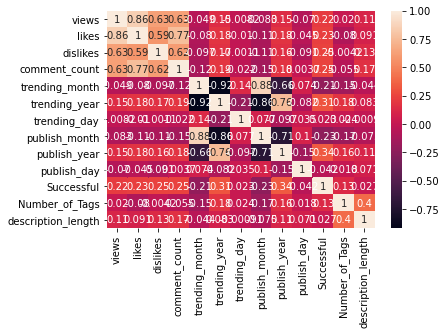

In [73]:
sns.heatmap(df_Film.corr(), annot=True)


In [74]:
X = df_Film.drop(columns='Successful')
y = df_Film['Successful']

In [75]:
X, X_hold, y, y_hold = train_test_split(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

In [76]:
cat_columns = [c for c in X_train.columns if X_train[c].dtype == 'O']
cat_columns

['Genre']

In [77]:
num_columns = [
    'likes',
    'dislikes',
    'comment_count',
    'Number_of_Tags',
    'description_length',
    'trending_month',
    'trending_year',
    'trending_day',
    'publish_month',
    'publish_year',
    'publish_day'
]

In [78]:
cat_transformer = OneHotEncoder(drop='first', handle_unknown = 'error', sparse= False)

num_transformer = StandardScaler()
preprocessor = ColumnTransformer([
    ('cats', cat_transformer, cat_columns),
    ('nums', num_transformer, num_columns)
])

In [79]:
pd.Series(y_train).value_counts(normalize=True)

True     0.867776
False    0.132224
Name: Successful, dtype: float64

## Decision Tree

Train F1: 0.9668
Train Precision: 0.9803
Train ROC-AUC: 0.9139
********************
Test F1: 0.9570
Test Precision: 0.9649
Test ROC-AUC: 0.8549


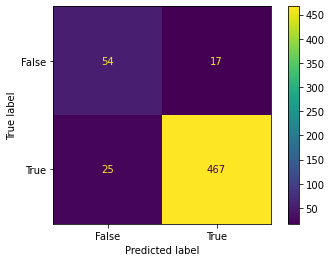

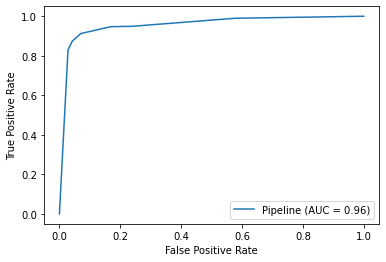

In [80]:
clf_dt = Pipeline(steps = [
('preprocessor', preprocessor),
('tree', DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_leaf=1))])

clf_dt.fit(X_train[used_cols], y_train)

train_preds = clf_dt.predict(X_train[used_cols])
test_preds = clf_dt.predict(X_test[used_cols])

train_probas = clf_dt.predict_proba(X_train[used_cols])[:, 1]
test_probas = clf_dt.predict_proba(X_test[used_cols])[:, 1]
    
param_grid = {
    "tree__max_depth": [3, 4, 5],
    "tree__min_samples_leaf": [1, 2, 10],
    }
gs = GridSearchCV(clf_dt, param_grid, cv=5, scoring="roc_auc")
gs.fit(X_train[used_cols], y_train)
    
evaluate(clf_dt, X_train[used_cols], X_test[used_cols], y_train, y_test)

# Only looking at what we can control

In [81]:
df = df.drop(columns="views")

In [82]:
df = df.drop(columns="likes")

In [83]:
df = df.drop(columns="dislikes")

In [84]:
df = df.drop(columns="comment_count")

In [86]:
df

,trending_month,trending_year,trending_day,publish_month,publish_year,publish_day,Successful,Number_of_Tags,Genre,description_length
0,11,2017,14,11,2017,13,True,1,People & Blogs,136
1,11,2017,14,11,2017,13,True,4,Entertainment,80
2,11,2017,14,11,2017,12,True,23,Comedy,74
3,11,2017,14,11,2017,13,True,27,Entertainment,123
4,11,2017,14,11,2017,12,True,14,Entertainment,53
...,...,...,...,...,...,...,...,...,...,...
40944,6,2018,14,5,2018,18,True,14,Pets & Animals,9
40945,6,2018,14,5,2018,18,True,1,People & Blogs,1
40946,6,2018,14,5,2018,18,True,24,Entertainment,67
40947,6,2018,14,5,2018,17,True,22,Film & Animation,242


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

In [88]:
cat_columns = [c for c in X_train.columns if X_train[c].dtype == 'O']
num_columns = [
    'Number_of_Tags',
    'description_length',
    'trending_month',
    'trending_year',
    'trending_day',
    'publish_month',
    'publish_year',
    'publish_day'
]
used_cols = [*cat_columns, *num_columns]
used_cols

cat_transformer = OneHotEncoder(drop='first', handle_unknown = 'error', sparse= False)

num_transformer = StandardScaler()
preprocessor = ColumnTransformer([
    ('cats', cat_transformer, cat_columns),
    ('nums', num_transformer, num_columns)
])

In [89]:
pd.Series(y_train).value_counts(normalize=True)

True     0.879958
False    0.120042
Name: Successful, dtype: float64

Train F1: 0.9455
Train Precision: 0.8977
Train ROC-AUC: 0.5820
********************
Test F1: 0.9175
Test Precision: 0.8476
Test ROC-AUC: 0.5472


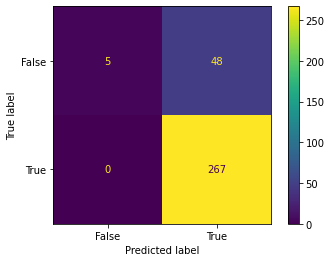

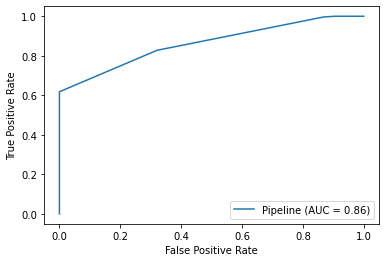

In [90]:
clf_dt = Pipeline(steps = [
('preprocessor', preprocessor),
('tree', DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_leaf=1))])

clf_dt.fit(X_train[used_cols], y_train)

train_preds = clf_dt.predict(X_train[used_cols])
test_preds = clf_dt.predict(X_test[used_cols])

train_probas = clf_dt.predict_proba(X_train[used_cols])[:, 1]
test_probas = clf_dt.predict_proba(X_test[used_cols])[:, 1]
    
param_grid = {
"tree__max_depth": [3, 4, 5],
"tree__min_samples_leaf": [1, 2, 10],}
    
gs = GridSearchCV(clf_dt, param_grid, cv=5, scoring="roc_auc")
gs.fit(X_train[used_cols], y_train)
    
evaluate(clf_dt, X_train[used_cols], X_test[used_cols], y_train, y_test)

Train F1: 0.9382
Train Precision: 0.8836
Train ROC-AUC: 0.5174
********************
Test F1: 0.9113
Test Precision: 0.8370
Test ROC-AUC: 0.5094


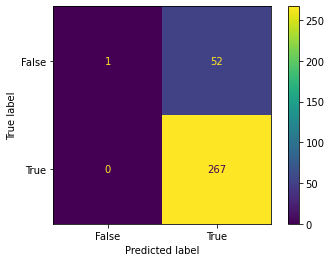

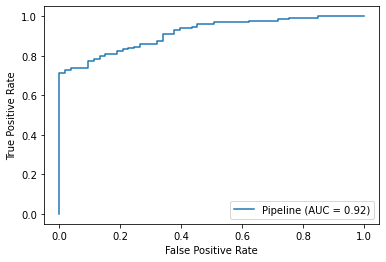

In [91]:
clf_rf = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(random_state=42, max_depth=3, min_samples_leaf=1))
])

clf_rf.fit(X_train[used_cols], y_train)

evaluate(clf_rf, X_train[used_cols], X_test[used_cols], y_train, y_test)

In [101]:
clf_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(random_state=42, max_iter=200))
])

clf_lr.fit(X_train[used_cols], y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cats',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Genre']),
                                                 ('nums', StandardScaler(),
                                                  ['Number_of_Tags',
                                                   'description_length',
                                                   'trending_month',
                                                   'trending_year',
                                                   'trending_day',
                                                   'publish_month',
                                                   'publish_year',
                                                   'publish_day'])])),
                ('logreg', LogisticRegression(max_iter=200, ra

Train F1: 0.9375
Train Precision: 0.8851
Train ROC-AUC: 0.5243
********************
Test F1: 0.9172
Test Precision: 0.8498
Test ROC-AUC: 0.5547


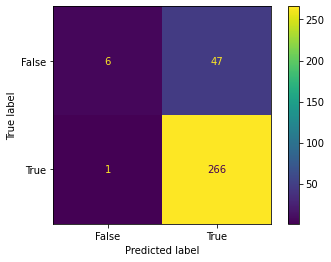

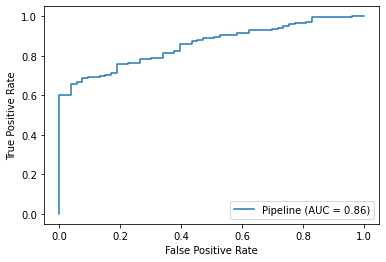

In [93]:
evaluate(clf_lr, X_train[used_cols], X_test[used_cols], y_train, y_test)

Train F1: 0.9141
Train Precision: 0.8462
Train ROC-AUC: 0.5102
********************
Test F1: 0.8958
Test Precision: 0.8190
Test ROC-AUC: 0.5112


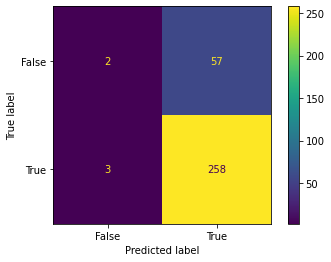

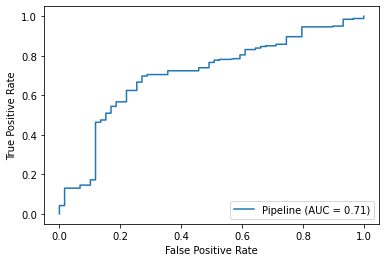

In [83]:
clf_nb = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('bayes', GaussianNB())
])
clf_nb.fit(X_train[used_cols], y_train)

evaluate(clf_nb, X_train[used_cols], X_test[used_cols], y_train, y_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cats',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Genre']),
                                                 ('nums', StandardScaler(),
                                                  ['Number_of_Tags',
                                                   'description_length',
                                                   'trending_month',
                                                   'trending_year',
                                                   'trending_day',
                                                   'publish_month',
                                                   'publish_year',
                                                   'publish_day'])])),
                ('logreg', LinearRegression())])

ValueError: Pipeline should be a binary classifier

ValueError: Found input variables with inconsistent numbers of samples: [39856, 1278]